In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import healpy as hp

In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('minion_1016_sqlite.db')
outDir = 'coadd'
resultsDb = db.ResultsDb(outDir=outDir)


In [3]:
sql = 'filter="r"' 
slicer = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA')
metric = metrics.Coaddm5Metric()

bundleList = []
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database with constraint filter="r"
Found 538713 visits
Running:  ['opsim_CoaddM5_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="r"" constraint now.
monopole: 26.7507  dipole: lon: 79.9287, lat: -67.3707, amp: 0.172467
Plotting complete.


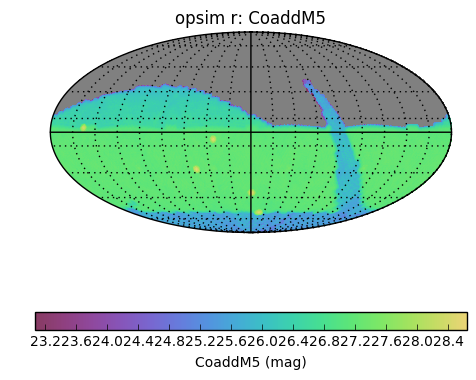

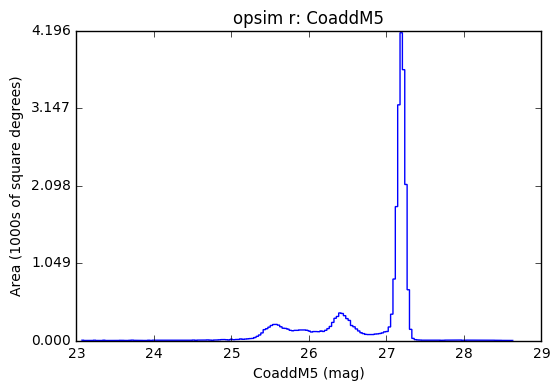

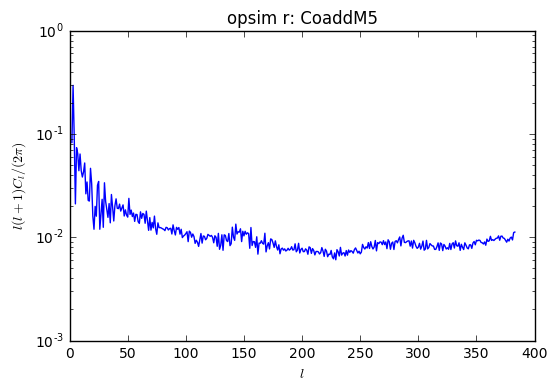

In [4]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

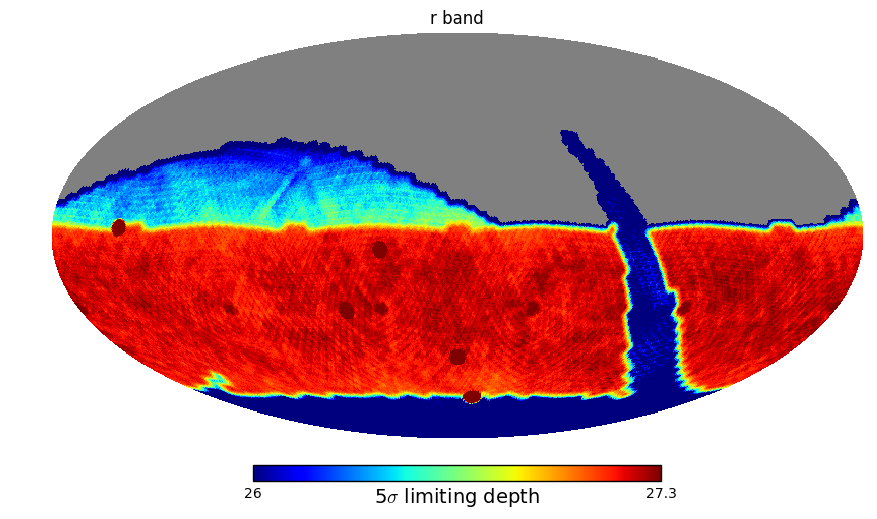

In [12]:
hp.mollview(bundleList[0].metricValues, max=27.3, min=26., title='r band', unit=r'5$\sigma$ limiting depth')